In [72]:
 # Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/Rica6/Desktop/Python/Matplotlib/05-Matplotlib/Resources/city_data.csv"
ride_data_to_load = "C:/Users/Rica6/Desktop/Python/Matplotlib/05-Matplotlib/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Merge the DataFrames

In [73]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [74]:
#checking the null values
city_data_df.isnull().sum()
ride_data_df.isnull().sum()

print(city_data_df.count())
print(ride_data_df.count())

city            120
driver_count    120
type            120
dtype: int64
city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64


In [75]:
# Create the Urban, Suburban, Rural city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]  

In [76]:
#  1. Get the total rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

#Total Rides
total_rides_per_type =  pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_per_type 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [77]:
 # 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# a simple dictionary
drivers = {'Rural' : rural_driver_count.sum(),
        'Suburban' : suburban_driver_count.sum(),
        'Urban' : urban_driver_count.sum()}
   
# create series from dictionary
total_drivers_per_type = pd.Series(drivers)
total_drivers_per_type

Rural         78.0
Suburban     490.0
Urban       2405.0
dtype: float64

In [78]:
# 3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [79]:
#  4. Get the average fare per ride for each city type.
avg_fare_ride = sum_fares_by_type/total_rides_per_type
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [80]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_driver = sum_fares_by_type[('Urban')]/urban_driver_count.sum()
suburban_avg_fare_driver = sum_fares_by_type[('Suburban')]/suburban_driver_count.sum() 
rural_avg_fare_driver = sum_fares_by_type[('Rural')]/rural_driver_count.sum()

# OR Simply
avg_fare_drive = sum_fares_by_type/total_drivers_per_type
#output
avg_fare_drive

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [81]:
 #  6. Create a PyBer summary DataFrame.
# initialise data of lists.
data = {'Total Rides':total_rides_per_type,
        'Tota Drivers':total_drivers_per_type,
       'Total Fares': sum_fares_by_type,
       'Average Fare per Ride': avg_fare_ride,
       'Average Fare per Driver': avg_fare_drive}
  
# Creates pandas DataFrame.
pyber_summary_df = pd.DataFrame(data)
  
# print the data
pyber_summary_df

,Total Rides,Tota Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [82]:
 #  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [83]:
 #  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:.0f}".format)

pyber_summary_df["Tota Drivers"] = pyber_summary_df["Tota Drivers"].map("{:,.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# print the data
pyber_summary_df

,Total Rides,Tota Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57


# Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [84]:
 # 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.# Get the sum of the fares for each city type.
city_sum_profit =  pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
city_sum_profit.head(10)

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
2019-01-01 09:45:36,Rural,43.69
2019-01-01 12:32:48,Suburban,25.56
2019-01-01 14:40:14,Urban,5.42
2019-01-01 14:42:25,Urban,12.31


In [85]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
city_sum_profit = city_sum_profit.reset_index()
city_sum_profit.tail(10)

,date,type,fare
2365,2019-05-07 20:05:15,Urban,24.20
2366,2019-05-07 20:22:19,Urban,18.74
2367,2019-05-07 20:40:29,Suburban,24.89
2368,2019-05-08 01:54:18,Urban,32.69
2369,2019-05-08 02:31:25,Urban,41.33
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77
2374,2019-05-08 13:10:18,Urban,18.04


In [86]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_sum_profit_pivot = city_sum_profit.pivot(index="date", columns="type", values="fare")
city_sum_profit_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [87]:
 # 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'
city_df = city_sum_profit.loc[(city_sum_profit["date"] >= '2019-01-01') & (city_sum_profit['date'] <= '2019-04-29')]
print(city_df)

                     date      type   fare
0     2019-01-01 00:08:16     Urban  37.91
1     2019-01-01 00:46:46  Suburban  47.74
2     2019-01-01 02:07:24  Suburban  24.07
3     2019-01-01 03:46:50     Urban   7.57
4     2019-01-01 05:23:21     Urban  10.75
...                   ...       ...    ...
2191  2019-04-28 14:28:36     Urban  11.46
2192  2019-04-28 16:29:16     Urban  36.42
2193  2019-04-28 17:26:52     Urban  31.43
2194  2019-04-28 17:38:09  Suburban  34.87
2195  2019-04-28 19:35:03  Suburban  16.96

[2196 rows x 3 columns]


In [88]:
 # 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
city_sum_profit_pivot.index = pd.to_datetime(city_sum_profit_pivot.index)

In [89]:
# 6. Check that the datatype for the index is datetime using df.info()
#city_df.info()
city_sum_profit_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [90]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
city_profit_per_week = city_sum_profit_pivot.resample("W").sum()
city_profit_per_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


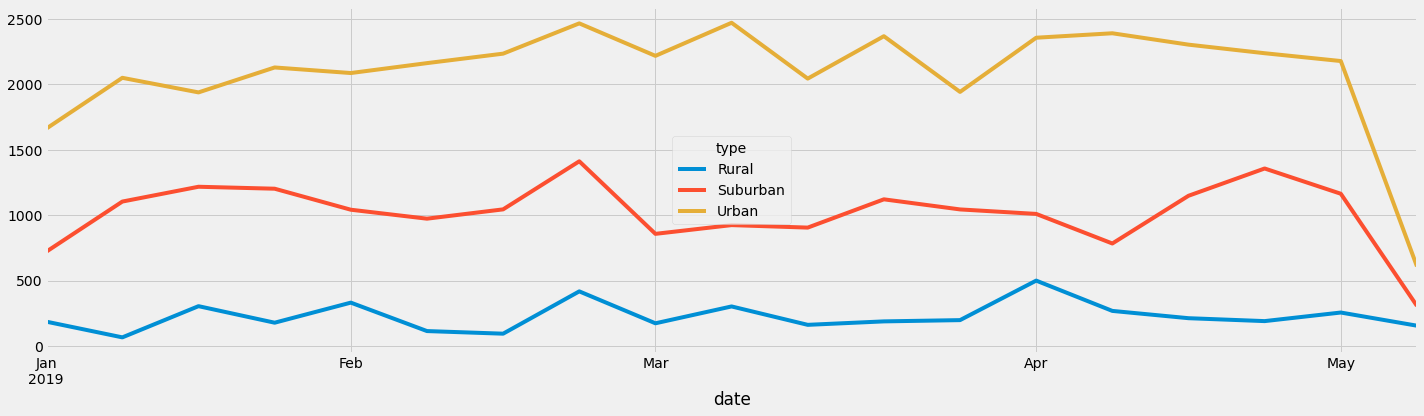

In [91]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np

# Set x-axis and tick locations.
x_axis = np.arange(len(city_profit_per_week))
tick_locations = [value for value in x_axis]

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Add a title 
weekly_rides.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_rides.set_xlabel("Month")
weekly_rides.set_ylabel("Fare($USD)")
 # Plot the resampled DataFrame.
weekly_rides = city_profit_per_week.plot(figsize = (20,6))
plt.tight_layout()
plt.show()                      

# The output line graph above is a bit different between the month of April and May than what was given in the challenge.  This may be due to the date range selected in step 4 being slightly off.